## NUTS2

### View data tendencies by region in production data

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
prod2_df = pd.read_csv('../CSVs/Production_NUTS2_2019.csv', sep=",")
prod2_df.head(300)

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,11,Norte,2,2019,1312536063,1978.7
1,15,Algarve,2,2019,373196278,3709.5
2,16,Centro,2,2019,1786415564,2820.8
3,17,Área Metropolitana de Lisboa,2,2019,313163976,3451.5
4,18,Alentejo,2,2019,2441935279,1038.8
5,20,Região Autónoma dos Açores,2,2019,423978604,3514.6
6,30,Região Autónoma da Madeira,2,2019,107140853,23269.4


C:\Users\cespe\AppData\Local\Temp\ipykernel_5252\240476471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_name', y='p.value_eur', data=prod2_df, palette='viridis')


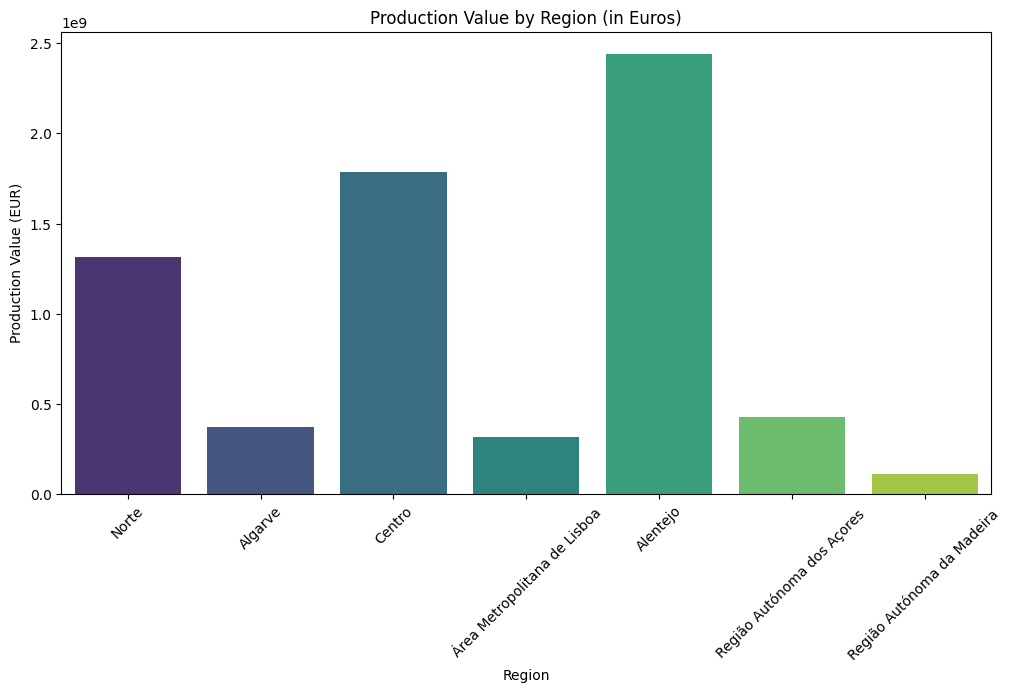

In [10]:
# Bar Chart of Production Value by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='p.value_eur', data=prod2_df, palette='viridis')
plt.title('Production Value by Region (in Euros)')
plt.xlabel('Region')
plt.ylabel('Production Value (EUR)')
plt.xticks(rotation=45)
plt.show()

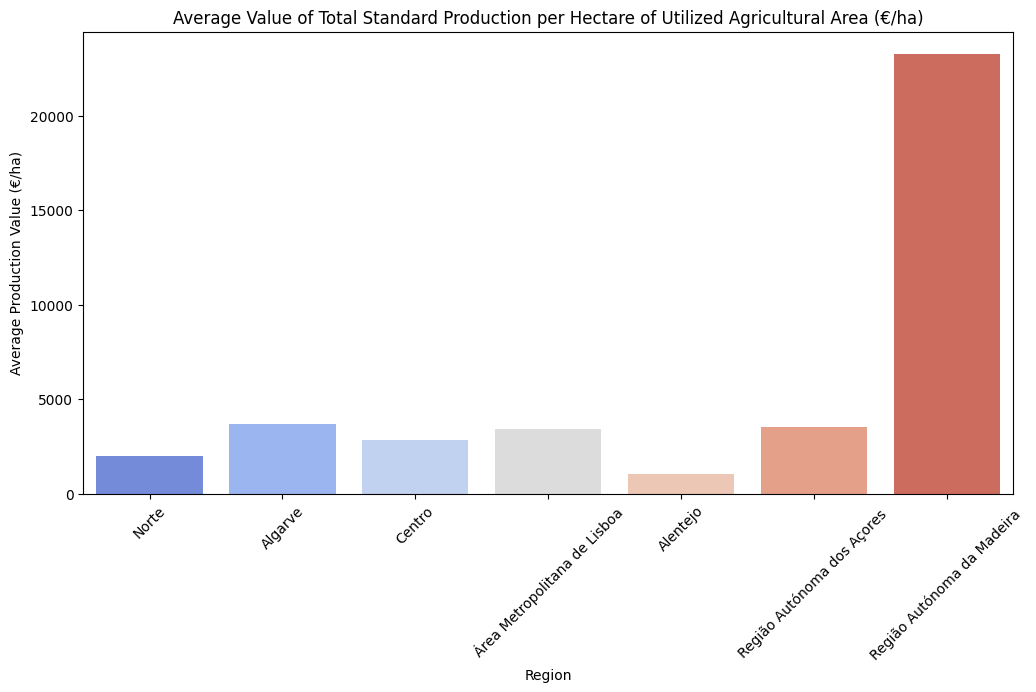

In [15]:
# Bar Chart of Average Production Value per Hectare by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='p.area_ha', hue='region_name', data=prod2_df, palette='coolwarm', dodge=False)
plt.title('Average Value of Total Standard Production per Hectare of Utilized Agricultural Area (€/ha)')
plt.xlabel('Region')
plt.ylabel('Average Production Value (€/ha)')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Quitar la leyenda
plt.show()

### View data tendencies by region in labour data data (allready do It in 'Labour_education.ipynb')

In [21]:
# Load the data of labour 

labour_NUTS2_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
labour_NUTS2_df.head(100)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,11,Norte,2,2019,119432,Total labour force in agriculture
1,11,Norte,2,2019,93339,Family labour force
2,11,Norte,2,2019,50025,Holder
3,11,Norte,2,2019,28116,Spouse
4,11,Norte,2,2019,15198,Other family members
...,...,...,...,...,...,...
58,30,Região Autónoma da Madeira,2,2019,1927,Other family members
59,30,Região Autónoma da Madeira,2,2019,1538,Non-family labour force
60,30,Região Autónoma da Madeira,2,2019,716,Regular
61,30,Região Autónoma da Madeira,2,2019,766,Non-regular


In [24]:
lab_no_totals = labour_NUTS2_df[labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS2_df[(labour_NUTS2_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS2_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS2_df[(labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS2_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS2_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [25]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name'])['l.value'].sum().reset_index()

In [26]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [27]:
# Calculate the percentage of each labor type within each region
labour_NUTS2_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS2_df = labour_NUTS2_df[labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS2_df.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,percentage
1,11,Norte,2,2019,93339,Family labour force,78.15
2,11,Norte,2,2019,50025,Holder,41.89
3,11,Norte,2,2019,28116,Spouse,23.54
4,11,Norte,2,2019,15198,Other family members,12.73
5,11,Norte,2,2019,26092,Non-family labour force,21.85
6,11,Norte,2,2019,12515,Regular,10.48
7,11,Norte,2,2019,11186,Non-regular,9.37
8,11,Norte,2,2019,2392,Workers not hired by the holder,2.00
10,15,Algarve,2,2019,7134,Family labour force,52.00
11,15,Algarve,2,2019,4335,Holder,31.60


### Compare the relation between production and labour

In [ ]:
import pandas as pd

# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
education_NUTS2_df_no_totals['region_name'] = education_NUTS2_df_no_totals['region_name'].str.strip()
labour_NUTS2_df['region_name'] = labour_NUTS2_df['region_name'].str.strip()

# Filtrar los datos de educación y trabajo para el mismo año (2019 en este caso)
education_2019 = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['e.year'] == 2019]
labour_2019 = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Pivotear los datos de educación para obtener los porcentajes por nivel educativo
education_pivot = education_2019.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivotear los datos de trabajo para obtener los valores por tipo de labor
labour_pivot = labour_2019.pivot_table(values='l.value', index='region_name', columns='ltn.type_labour', fill_value=0)

# Unir los datos de educación y trabajo
combined_df = pd.concat([education_pivot, labour_pivot], axis=1, join='inner')

# Ver el DataFrame combinado
print(combined_df.head())

## NUTS4

### View data tendencies by region in production data

In [16]:
prod4_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")
prod4_df.head(300)

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5
1,1111602,Caminha,4,2019,3015466,1058.6
2,1111603,Melgaço,4,2019,5191947,494.9
3,1111604,Monção,4,2019,9358899,1577.4
4,1111605,Paredes de Coura,4,2019,5383718,1276.3
...,...,...,...,...,...,...
295,2004802,Santa Cruz das Flores,4,2019,2888209,1319.7
296,2004901,Corvo,4,2019,420922,443.1
297,3003101,Calheta,4,2019,9533627,21291.8
298,3003102,Câmara de Lobos,4,2019,12592196,19858.1


In [17]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
prod4_df['region_name_nuts2'] = prod4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
prod4_df.head(10)


,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte
5,1111606,Ponte da Barca,4,2019,4831458,572.9,Norte
6,1111607,Ponte de Lima,4,2019,20001117,2566.9,Norte
7,1111608,Valença,4,2019,4101833,2858.9,Norte
8,1111609,Viana do Castelo,4,2019,16334535,2145.3,Norte
9,1111610,Vila Nova de Cerveira,4,2019,2058865,1676.6,Norte


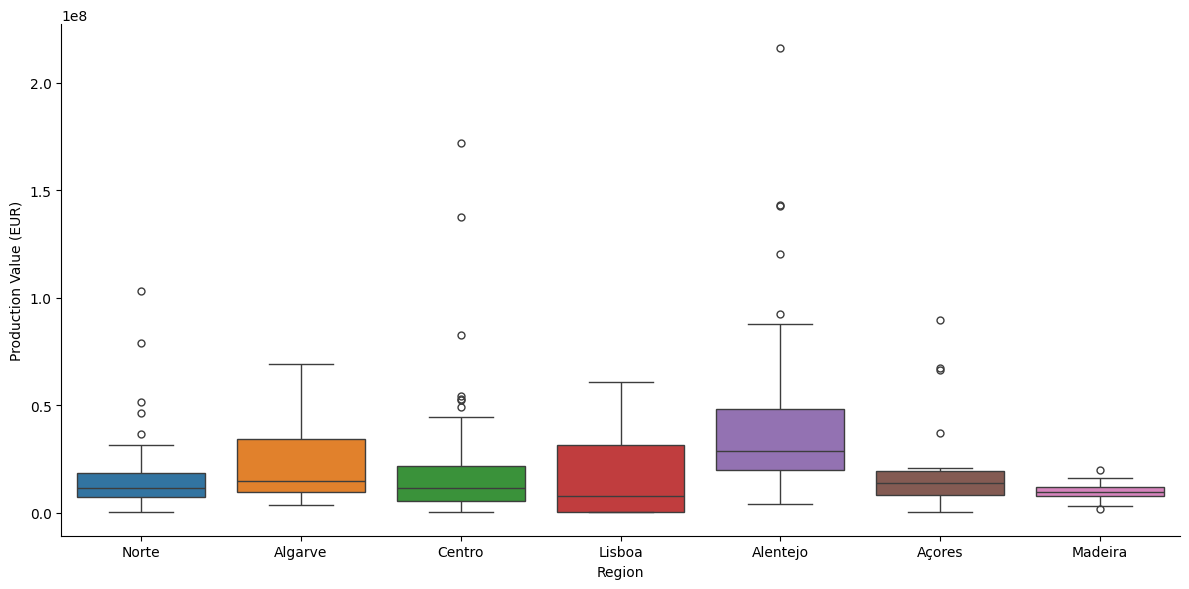

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=prod4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="p.value_eur", # Variable on y-axis: percentage
    hue="region_name_nuts2", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Region') # Label the x-axis
plt.ylabel('Production Value (EUR)') # y-axis label


# Show the chart
plt.show()

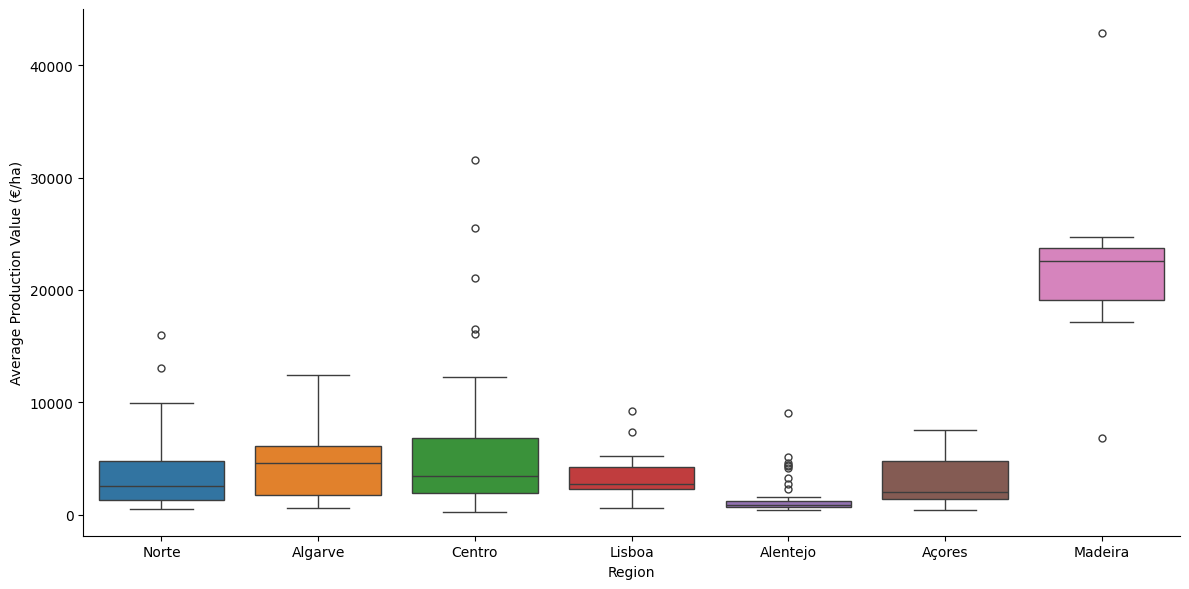

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=prod4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="p.area_ha", # Variable on y-axis: percentage
    hue="region_name_nuts2", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Region') # Label the x-axis
plt.ylabel('Average Production Value (€/ha)') # y-axis label


# Show the chart
plt.show()

### View data tendencies by region in labour data data (allready do It in 'Labour_education.ipynb')

### Compare the relation between education and labour